In [70]:
%matplotlib inline

import lib
import numpy as np
import os.path
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
basedir = '/scratch/mizuchi1/angus/spurious'

# Lock exchange

In [3]:
nu_h_lock = ['0.01', '0.1', '1', '10', '100', '200']
basedir_lock = os.path.join(basedir, 'lock_exchange')

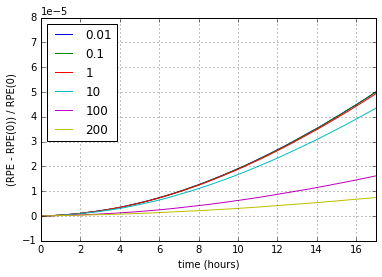

In [4]:
for nu in nu_h_lock:
    plt.plot(*lib.rpe_norm(os.path.join(basedir_lock, 'lock_exchange_KH{}/prog.nc'.format(nu)), step=1), label=nu)
    
plt.legend(loc='upper left')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().set_ylim(-1e-5, 8e-5)
plt.gca().set_xlim(0, 17)
plt.grid()
plt.xlabel('time (hours)')
plt.ylabel('(RPE - RPE(0)) / RPE(0)')

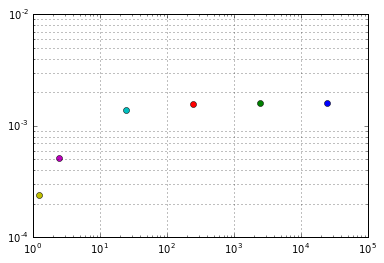

In [9]:
for nu in nu_h_lock:
    drpe = lib.drpe_dt(os.path.join(basedir_lock, 'lock_exchange_KH{}/prog.nc'.format(nu)))
    plt.loglog(0.4956 * 0.5e3 / float(nu), drpe.mean(), 'o')
    
plt.grid(which='both', axis='y')
plt.grid()

# Overflow

In [15]:
nu_h_overflow = ['0.01', '0.1', '1', '10', '100', '1000']
basedir_overflow = os.path.join(basedir, 'flow_downslope')

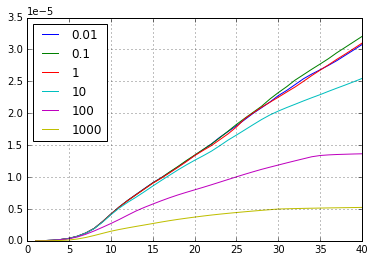

In [16]:
for nu in nu_h_overflow:
    plt.plot(*lib.rpe_norm(os.path.join(basedir_overflow, 'flow_downslope_KH{}/prog.nc'.format(nu)), step=1), label=nu)
    
plt.legend(loc='upper left')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid()

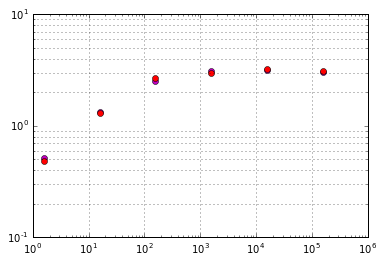

In [123]:
for nu in nu_h_overflow:
    drpe = lib.drpe_dt(os.path.join(basedir_overflow, 'flow_downslope_KH{}/prog.nc'.format(nu)))
    plt.loglog(1.57 * 1e3 / float(nu), drpe.mean(), 'om')
    
for nu in nu_h_overflow:
    drpe = lib.drpe_dt(os.path.join(basedir_overflow, 'flow_downslope_PPM_KH{}/prog.nc'.format(nu)))
    plt.loglog(1.57 * 1e3 / float(nu), drpe.mean(), 'or')
    
plt.grid(which='both', axis='y')
plt.grid()

Just print the raw data for ease...

In [62]:
for nu in nu_h_overflow:
    drpe = lib.drpe_dt(os.path.join(basedir_overflow, 'flow_downslope_KH{}/prog.nc'.format(nu)))
    print(1.57 * 1e3 / float(nu), drpe.mean())

157000.0 3.06022350329
15700.0 3.183418813
1570.0 3.08151207994
157.0 2.52240921828
15.7 1.33891777766
1.57 0.514501230246


In [63]:
for nu in nu_h_overflow:
    print(lib.drpe_dt(os.path.join(basedir_overflow, 'flow_downslope_sigma_KH{}/prog.nc'.format(nu))).mean())

2.86269289811
3.17080043683
2.51320419569
2.10586283406
1.19909424331
0.434642933249


Calculate the dRPE/dt split for a regular and sigma case.

In [66]:
print(list(map(lambda x: x.mean(),
          lib.drpe_dt_split(os.path.join(basedir_overflow, 'flow_downslope_split_KH1/split.nc')))))
print(list(map(lambda x: x.mean(),
          lib.drpe_dt_split(os.path.join(basedir_overflow, 'flow_downslope_sigma_split_KH1/split.nc')))))

[2.9705119855472133, 0.070271881487634441]
[2.4536780545233885, 0.047725355267524722]


# Internal waves

In [19]:
nu_h_waves = ['0.01', 1, 15, 150]
basedir_waves = os.path.join(basedir, 'internal_waves')

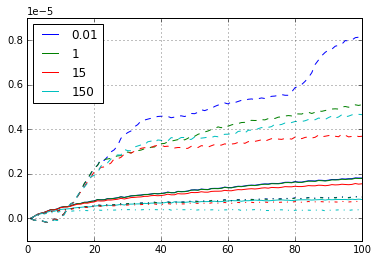

In [32]:
for nu in nu_h_waves:
    plt.plot(*lib.rpe_norm(os.path.join(basedir_waves,
                                       'internal_waves_KH{}/prog.nc'.format(nu)), step=1),
             label=nu)
    
plt.gca().set_prop_cycle(None)
for nu in nu_h_waves:
    plt.plot(*lib.rpe_norm(os.path.join(basedir_waves,
                                        'internal_waves_T1d_KH{}/prog.nc'.format(nu)), step=1),
            '--')
    
plt.gca().set_prop_cycle(None)
for nu in nu_h_waves:
    plt.plot(*lib.rpe_norm(os.path.join(basedir_waves,
                                        'internal_waves_T1h_KH{}/prog.nc'.format(nu)), step=1),
            '-.')
    
plt.legend(loc='upper left')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid()

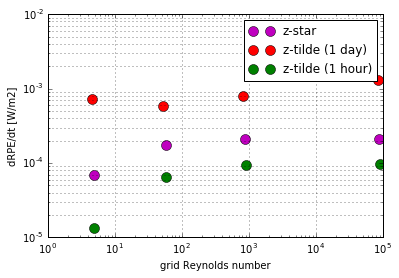

In [69]:
#plt.figure(figsize=(10,8))
ms = 10

l = 'z-star'
for nu in nu_h_waves:
    expt = os.path.join(basedir_waves, 'internal_waves_KH{}'.format(nu))
    drpe = lib.drpe_dt(os.path.join(expt, 'prog.nc'))
    vel = lib.vel_scale(os.path.join(expt, 'ocean.stats.nc'))
    plt.loglog(vel[9:].mean() * 5e3 / float(nu), drpe[9:].mean(), 'om', label=l, markersize=ms)
    if l != '_': l = '_'
    
l = 'z-tilde (1 day)'
for nu in nu_h_waves:
    expt = os.path.join(basedir_waves, 'internal_waves_T1d_KH{}'.format(nu))
    drpe = lib.drpe_dt(os.path.join(expt, 'prog.nc'))
    vel = lib.vel_scale(os.path.join(expt, 'ocean.stats.nc'))
    plt.loglog(vel[9:].mean() * 5e3 / float(nu), drpe[9:].mean(), 'or', label=l, markersize=ms)
    if l != '_': l = '_'
    
l = 'z-tilde (1 hour)'
for nu in nu_h_waves:
    expt = os.path.join(basedir_waves, 'internal_waves_T1h_KH{}'.format(nu))
    drpe = lib.drpe_dt(os.path.join(expt, 'prog.nc'))
    vel = lib.vel_scale(os.path.join(expt, 'ocean.stats.nc'))
    plt.loglog(vel[9:].mean() * 5e3 / float(nu), drpe[9:].mean(), 'og', label=l, markersize=ms)
    if l != '_': l = '_'
    
plt.grid(which='both', axis='y')
plt.grid()
plt.legend()
plt.xlabel('grid Reynolds number')
plt.ylabel('dRPE/dt [W/m2]')

Calculate RPE split for z-star runs

In [38]:
expts = [os.path.join(basedir_waves, 'internal_waves_split_KH{}'.format(nu)) for nu in nu_h_waves]
drpe = [lib.drpe_dt_split(os.path.join(expt, 'split.nc')) for expt in expts]
vel = [lib.vel_scale(os.path.join(expt, 'ocean.stats.nc')) for expt in expts]

gridRe = [v[9:].mean() * 5e3 / float(nu) for v, nu in zip(vel, nu_h_waves)]

In [41]:
expts_t1d = [os.path.join(basedir_waves, 'internal_waves_split_T1d_KH{}'.format(nu)) for nu in nu_h_waves]
drpe_t1d = [lib.drpe_dt_split(os.path.join(expt, 'split.nc')) for expt in expts_t1d]
vel_t1d = [lib.vel_scale(os.path.join(expt, 'ocean.stats.nc')) for expt in expts_t1d]

gridRe_t1d = [v[9:].mean() * 5e3 / float(nu) for v, nu in zip(vel_t1d, nu_h_waves)]

In [44]:
expts_t1h = [os.path.join(basedir_waves, 'internal_waves_split_T1h_KH{}'.format(nu)) for nu in nu_h_waves]
drpe_t1h = [lib.drpe_dt_split(os.path.join(expt, 'split.nc')) for expt in expts_t1h]
vel_t1h = [lib.vel_scale(os.path.join(expt, 'ocean.stats.nc')) for expt in expts_t1h]

gridRe_t1h = [v[9:].mean() * 5e3 / float(nu) for v, nu in zip(vel_t1h, nu_h_waves)]

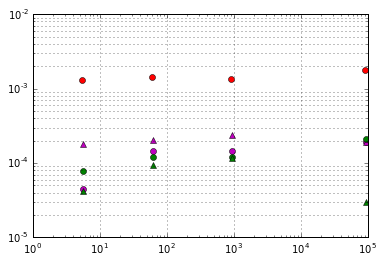

In [45]:
for r, g in zip(drpe, gridRe):
    plt.loglog(g, r[0][9:].mean(), 'om')
    plt.loglog(g, r[1][9:].mean(), '^m')
    
for r, g in zip(drpe_t1d, gridRe_t1d):
    plt.loglog(g, r[0][9:].mean(), 'or')
    plt.loglog(g, r[1][9:].mean(), '^r')
    
for r, g in zip(drpe_t1h, gridRe_t1h):
    plt.loglog(g, r[0][9:].mean(), 'og')
    plt.loglog(g, r[1][9:].mean(), '^g')
    
plt.grid()
plt.grid(which='both', axis='y')

/home/users/AngusGibson/.local/lib/python3.5/site-packages/xarray/conventions.py:382: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)


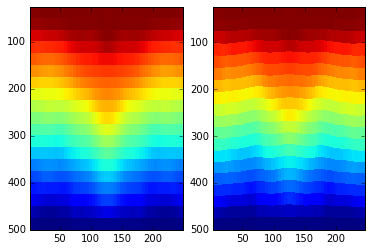

In [113]:
dz = xr.open_dataset(os.path.join(basedir_waves, 'internal_waves_KH0.01/prog.nc'))
dt = xr.open_dataset(os.path.join(basedir_waves, 'internal_waves_T1h_KH0.01/prog.nc'))


fz = dz.isel(Time=-1).mean('yh')
ft = dt.isel(Time=-1).mean('yh')

plt.subplot(121)
plt.pcolor(fz.xh, np.cumsum(fz.h_postale, axis=0), fz.T_postale)
plt.axis('tight')
plt.gca().invert_yaxis()

plt.subplot(122)
plt.pcolor(ft.xh, np.cumsum(ft.h_postale, axis=0), ft.T_postale)
plt.axis('tight')
plt.gca().invert_yaxis()

/home/users/AngusGibson/.local/lib/python3.5/site-packages/xarray/conventions.py:382: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)


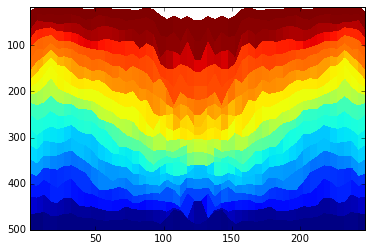

In [114]:
d = xr.open_dataset(os.path.join(basedir_waves, 'internal_waves_T1d_KH0.01/prog.nc'))
f = d.isel(Time=-1).mean('yh')

plt.pcolor(f.xh, np.cumsum(f.h_postale, axis=0), f.T_postale)
plt.axis('tight')
plt.gca().invert_yaxis()

# Baroclinic eddies

In [3]:
nu_h_eddies = [1, 5, 10, 20, 200]
basedir_eddies = os.path.join(basedir, 'baroclinic_eddies')

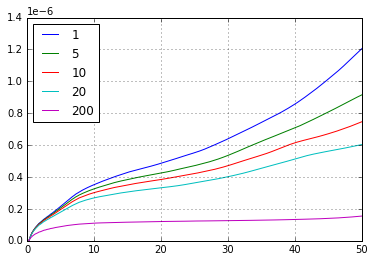

In [4]:
for nu in nu_h_eddies:
    plt.plot(*lib.rpe_norm(os.path.join(basedir_eddies,
                                        'baroclinic_eddies_DX4_KH{}/prog.nc'.format(nu)), step=1), label=nu)
    
plt.legend(loc='upper left')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid()

- Change the `CORIOLIS_SCHEME` from an energy-conserving one to an enstrophy-conserving one
- Examine the effect of CFL number by lowering the timestep

In [ ]:
#plt.plot(*lib.rpe_norm(os.path.join(basedir_eddies,
#                                    'baroclinic_eddies_DX4_KH1/prog.nc'), step=1), '--',
#        label='control')
plt.plot(*lib.rpe_norm(os.path.join(basedir_eddies,
                                    'baroclinic_eddies_DX4_enst_KH1/prog.nc'), step=1),
        label='enstrophy')
plt.plot(*lib.rpe_norm(os.path.join(basedir_eddies,
                                    'baroclinic_eddies_DX4_CFL_KH1/prog.nc'), step=1),
        label='CFL')

plt.plot(*lib.rpe_norm(os.path.join(basedir_eddies,
                                   'baroclinic_eddies_DX4_tilde_KH1/prog.nc'), step=1), '-.',
        label='tilde')

plt.legend(loc='upper left')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

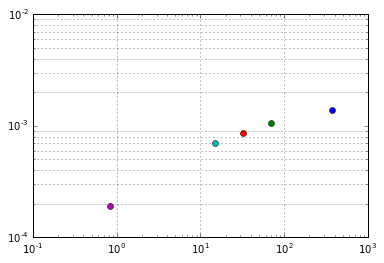

In [67]:
for nu in nu_h_eddies:
    drpe = lib.drpe_dt(os.path.join(basedir_eddies, 'baroclinic_eddies_DX4_KH{}/prog.nc'.format(nu)))
    vel = lib.vel_scale(os.path.join(basedir_eddies, 'baroclinic_eddies_DX4_KH{}/ocean.stats.nc'.format(nu)))
    plt.loglog(vel.mean() * 4e3 / float(nu), drpe.mean(), 'o')
    

plt.grid(which='both', axis='y')
plt.grid()

/home/users/AngusGibson/.local/lib/python3.5/site-packages/xarray/conventions.py:382: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/home/users/AngusGibson/.local/lib/python3.5/site-packages/xarray/conventions.py:401: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


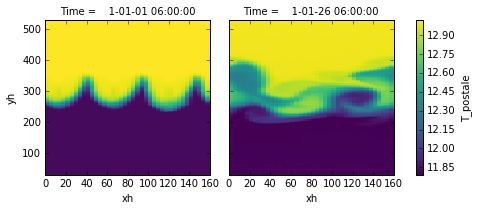

In [112]:
d = xr.open_dataset(os.path.join(basedir_eddies, 'baroclinic_eddies_DX4_KH5/prog.nc'))
d.isel(Time=[0,100], zl=0).T_postale.plot(x='xh', y='yh', col='Time')